In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from statsmodels.stats import weightstats
from statsmodels.stats import proportion
import statsmodels.stats.oneway as oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [ ]:
#conducting annova using python
#remember we are doing f-test here so will use f_oneway


In [2]:
machine1 = [150, 151, 150, 151, 150, 152]
machine2 = [153, 152, 148, 151, 149, 152]
machine3 = [156, 157, 154, 155, 155, 156]

In [3]:
stats.f_oneway(machine1, machine2, machine3)

F_onewayResult(statistic=24.487951807228924, pvalue=1.8860848544258556e-05)

In [5]:
oneway.anova_oneway((machine1, machine2, machine3))

<class 'statsmodels.stats.base.HolderTuple'>
statistic = 38.84351301208946
pvalue = 3.1385648641664156e-05
df = (2.0, 9.259754883511969)
df_num = 2.0
df_denom = 9.259754883511969
nobs_t = 18.0
n_groups = 3
means = [150.66666667 150.83333333 155.5       ]
nobs = [6. 6. 6.]
vars_ = [0.66666667 3.76666667 1.1       ]
use_var = unequal
welch_correction = True
tuple = (38.84351301208946, 3.1385648641664156e-05)

In [6]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [11]:
#doing post_hock test
m13 = pd.concat([pd.DataFrame(data={'volume': machine1, 'machine': 'Machine1'}),
pd.DataFrame(data={'volume': machine2, 'machine': 'Machine2'}),
pd.DataFrame(data={'volume': machine3, 'machine': 'Machine3'})])

In [12]:
m13

,volume,machine
0,150,Machine1
1,151,Machine1
2,150,Machine1
3,151,Machine1
4,150,Machine1
5,152,Machine1
0,153,Machine2
1,152,Machine2
2,148,Machine2
3,151,Machine2


In [14]:
post_hoc_test = pairwise_tukeyhsd(endog=m13['volume'], groups=m13['machine'], alpha=0.05)

In [16]:
print(post_hoc_test)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1   group2  meandiff p-adj  lower  upper  reject
------------------------------------------------------
Machine1 Machine2   0.1667   0.9 -1.8692 2.2025  False
Machine1 Machine3   4.8333 0.001  2.7975 6.8692   True
Machine2 Machine3   4.6667 0.001  2.6308 6.7025   True
------------------------------------------------------


<AxesSubplot:xlabel='machine', ylabel='volume'>

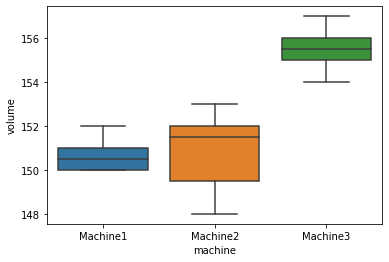

In [17]:
sns.boxplot(data=m13, x='machine', y='volume')

In [19]:
#Doing goodness of fit_test
#a t-shirt manufacture expects as actual sale of size = small, medium, large, extra_large

expected_ratio = pd.Series([0.1, 0.2, 0.4, 0.3])
observe = pd.Series([25, 41, 91, 68])
expected = expected_ratio * sum(observe)

In [20]:
expected

0    22.5
1    45.0
2    90.0
3    67.5
dtype: float64

In [21]:
observe

0    25
1    41
2    91
3    68
dtype: int64

In [22]:
stats.chisquare(f_obs=observe, f_exp=expected, ddof=0, axis=0)

Power_divergenceResult(statistic=0.648148148148148, pvalue=0.8853267818237286)

In [23]:
#contengency table
#lets create 3d array and data in it
sp_o1 = np.array([[22, 26, 23],[28, 62, 26],[77, 22, 66]])

In [24]:
sp_o1

array([[22, 26, 23],
       [28, 62, 26],
       [77, 22, 66]])

In [25]:
stats.chi2_contingency(observed=sp_o1)

(52.56711777636744,
 1.04977549182856e-10,
 4,
 array([[25.61647727, 22.1875    , 23.19602273],
        [41.85227273, 36.25      , 37.89772727],
        [59.53125   , 51.5625    , 53.90625   ]]))

In [ ]:
# 52.56 is chi(calculated), 1.04977 is p-value, 4 is degree of freedom